In [2]:
# task 1.1: Add used libraries and display uncleaned data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_rows', None)
ds = pd.read_csv('data.csv')


In [3]:
# Task 1.2: cleaning dataset
ds = pd.read_csv('data.csv')

ds = ds[:140]
ds = ds.drop([0,1,109])

for i in ds.index:
    if ds.reign[i]>1:
        ds = ds.drop(i)

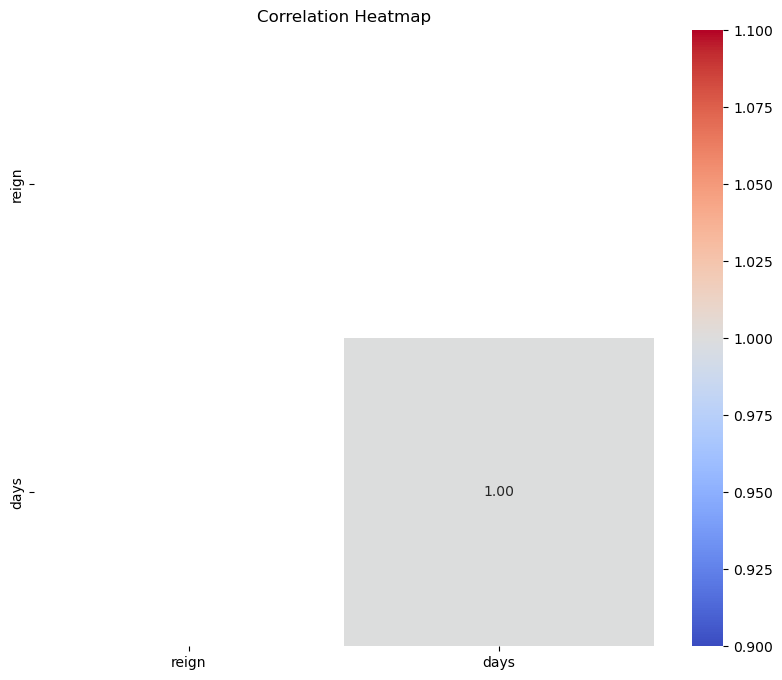

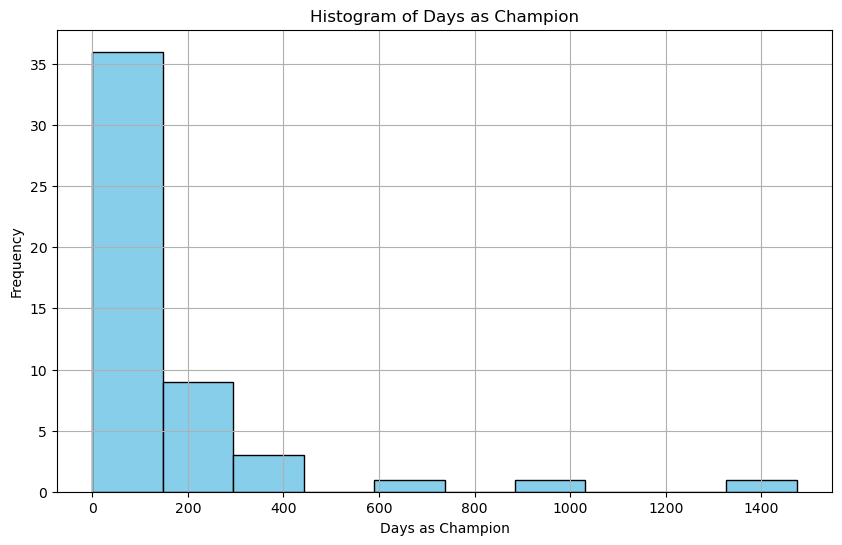

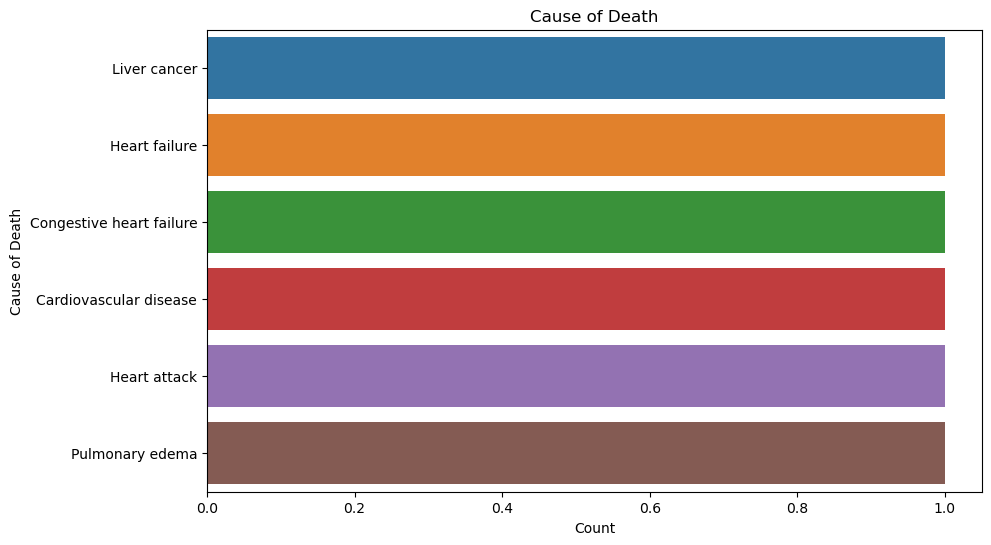

In [4]:
#task 1.3 adn 1.4 EDA
# Select only numeric columns
numeric_ds = ds.select_dtypes(include=['number'])

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_ds.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Days as Champion
plt.figure(figsize=(10, 6))
plt.hist(ds['days'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Days as Champion')
plt.xlabel('Days as Champion')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Cause of Death
plt.figure(figsize=(10, 6))
sns.countplot(y='cause_of_death', data=ds, order=ds['cause_of_death'].value_counts().index)
plt.title('Cause of Death')
plt.xlabel('Count')
plt.ylabel('Cause of Death')
plt.show()


In [5]:
#task 2
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, errors='raise')
    except Exception as e:
        print(f"Error converting date: {date_str}. Error: {str(e)}")
        return pd.NaT  # Return NaT for invalid dates
# Convert 'date' and 'date_of_birth' columns to datetime using the custom function
try:
    ds['date'] = ds['date'].apply(parse_date)
    ds['date_of_birth'] = ds['date_of_birth'].apply(parse_date)
except ValueError:
    print("Error: Unable to convert some dates. These rows will be skipped.")

# doing feature engineer by adding new features
if 'date' in ds.columns:
    # Drop rows with NaT values
    ds.dropna(subset=['date'], inplace=True)

    # 1. Championship Density
    total_days = (ds['date'].max() - ds['date'].min()).days
    ds['championship_density'] = ds['days'] / total_days

    # 2. Age at the Time of Winning the Title
    ds['age_at_winning'] = (ds['date'] - ds['date_of_birth']).dt.days / 365

    # 3. Title Reigns per Year
    ds['title_reigns_per_year'] = ds['reign'] / ((ds['date'].max() - ds['date'].min()).days / 365)

    # 4. Location Frequency
    location_frequency = ds['location'].value_counts(normalize=True)
    ds['location_frequency'] = ds['location'].map(location_frequency)

    # 5. Reign Duration
    ds['reign_duration'] = ds['days']

    # 6. Experience Level
    ds['experience_level'] = (ds['date'] - ds['date'].min()).dt.days
    #7 Winner
    ds['winner'] = (ds['days'] > 365).astype(int)
ds


,name,reign,days,date,event,location,link,belt,date_of_birth,date_of_death,cause_of_death,championship_density,age_at_winning,title_reigns_per_year,location_frequency,reign_duration,experience_level,winner
2,Ivan Koloff,1,21,2071-01-18,House show,"New York, NY",/wiki/Ivan_Koloff,WWE Championship,1942-08-25,2/18/2017,Liver cancer,0.000595,128.487671,0.010346,0.156863,21,34231,0
3,Pedro Morales,1,1027,2071-02-08,House show,"New York, NY",/wiki/Pedro_Morales,WWE Championship,1942-10-22,2/12/2019,NaN,0.029111,128.386301,0.010346,0.156863,1027,34252,1
4,Stan Stasiak,1,9,2073-12-01,House show,"Philadelphia, PA",/wiki/Stan_Stasiak,WWE Championship,1937-04-13,6/19/1997,Heart failure,0.000255,136.728767,0.010346,0.019608,9,35279,0
6,Superstar Billy Graham,1,296,1977-04-30,House show,"Baltimore, MD",/wiki/Superstar_Billy_Graham,WWE Championship,1943-06-07,NaN,NaN,0.008390,33.920548,0.010346,0.019608,296,0,0
7,Bob Backlund,1,648,1978-02-20,WWF on MSG Network,"New York, NY",/wiki/Bob_Backlund,WWE Championship,1949-08-14,NaN,NaN,0.018368,28.539726,0.010346,0.156863,648,296,1
8,Antonio Inoki,1,6,1979-11-30,House show,"Tokushima, Japan",/wiki/Antonio_Inoki,WWE Championship,1943-02-20,NaN,NaN,0.000170,36.800000,0.010346,0.019608,6,944,0
10,The Iron Sheik,1,28,1983-12-26,WWF on MSG Network,"New York, NY",/wiki/The_Iron_Sheik,WWE Championship,1942-03-15,NaN,NaN,0.000794,41.810959,0.010346,0.156863,28,2431,0
11,Hulk Hogan,1,1474,1984-01-23,WWF on MSG Network,"New York, NY",/wiki/Hulk_Hogan,WWE Championship,1953-08-11,NaN,NaN,0.041781,30.471233,0.010346,0.156863,1474,2459,1
12,André the Giant,1,0,1988-02-05,The Main Event I,"Indianapolis, IN",/wiki/Andr%C3%A9_the_Giant,WWE Championship,1946-05-19,1/27/1993,Congestive heart failure,0.000000,41.745205,0.010346,0.039216,0,3933,0
13,Ted DiBiase,1,8,1988-02-05,The Main Event I,"Indianapolis, IN",/wiki/Ted_DiBiase,WWE Championship,1954-01-18,NaN,NaN,0.000227,34.071233,0.010346,0.039216,8,3933,0


In [6]:
target_variable = 'winner'

if ds[target_variable].nunique() <= 2:
    print("Classification Task")
else:
    print("Regression Task or Clustering Task")
    
#Task 3 classification model
ds['successful_reign'] = (ds['days'] > 365).astype(int)

X = ds[['reign', 'days']]  # For simplicity, using only 'reign' and 'days' as features
y = ds['successful_reign']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Classification Task
Logistic Regression Accuracy: 0.91
Random Forest Accuracy: 0.91
Gradient Boosting Accuracy: 0.91


In [7]:
#Task 4
# by using classification report it will produce the f1 and recall
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")



Training Logistic Regression...
Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.00      0.00      0.00         0

    accuracy                           0.91        11
   macro avg       0.50      0.45      0.48        11
weighted avg       1.00      0.91      0.95        11



Training Random Forest...
Random Forest Accuracy: 0.91
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.00      0.00      0.00         0

    accuracy                           0.91        11
   macro avg       0.50      0.45      0.48        11
weighted avg       1.00      0.91      0.95        11



Training Gradient Boosting...


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.

Gradient Boosting Accuracy: 0.91
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.00      0.00      0.00         0

    accuracy                           0.91        11
   macro avg       0.50      0.45      0.48        11
weighted avg       1.00      0.91      0.95        11





C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Accuracy: 0.91
Random Forest Accuracy: 0.91
Gradient Boosting Accuracy: 0.91


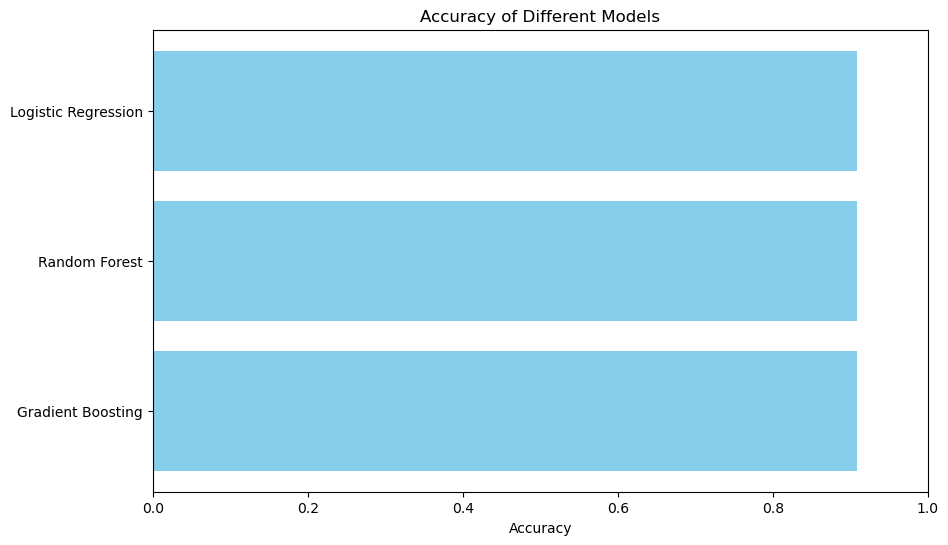

In [8]:
# Task 4 continue
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
# Dictionary to store accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

In [ ]:
# deployment task is done on visual studio as streamlit requirse python files
# first install stream lit by pip install streamlit on VSC
#import streamlit as st

#st.title('WWE Championship Winner Prediction')

# Once user clicks on the "Predict" button
#if st.button('Predict Winner'):
    # Prepare input features as a DataFrame using the last row of the dataset as an example
#    features = ds[['reign', 'days']].iloc[-1:].values
    
    # Make prediction
#    prediction_idx = model.predict(features)[0]  
#    predicted_winner_name = ds.iloc[prediction_idx]['name']
    
    # Display predicted winner's name
#    st.write(f'Predicted Winner: {predicted_winner_name}')
# finally run streamlit by : streamlit run 'ML_Assi.py' on VSC